In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Using MNIST for demonstration


In [5]:
# Load EMNIST dataset (for real character recognition, download EMNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images for MLP input
x_train = x_train.reshape(-1, 28*28) # Flatten (28x28) images to 1D array
x_test = x_test.reshape(-1, 28*28)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Dataset Loaded: ", x_train.shape, y_train.shape)


Dataset Loaded:  (60000, 784) (60000, 10)


In [13]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(28*28,)), # Input layer
    Dense(128, activation='relu'), # Hidden layer 1
    Dense(64, activation='relu'), # Hidden layer 2
    Dense(10, activation='softmax') # Output layer (10 classes for digits)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2135 - accuracy: 0.9354 - val_loss: 0.1095 - val_accuracy: 0.9651
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0914 - accuracy: 0.9726 - val_loss: 0.0967 - val_accuracy: 0.9704
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0663 - accuracy: 0.9801 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.1123 - val_accuracy: 0.9660
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0774 - val_accuracy: 0.9791
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0861 - val_accuracy: 0.9770
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.0818 - val_accuracy:

In [14]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9800
Test Accuracy: 98.00%


1/1 [==============================] - 0s 47ms/step


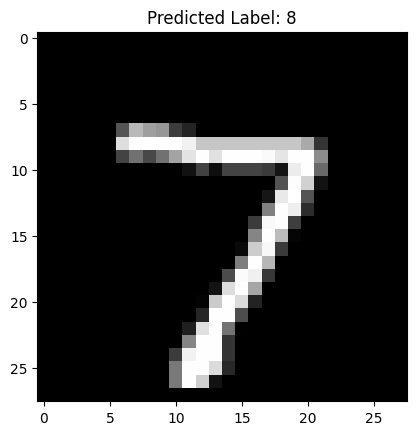

In [15]:
def recognize_character(img):
    img = cv2.resize(img, (28, 28)) # Resize to 28x28
    img = img / 255.0 # Normalize
    img = img.reshape(1, 28*28) # Flatten
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    return predicted_label

# Load a test image
sample_img = x_test[0].reshape(28, 28) # Take first image from test set
plt.imshow(sample_img, cmap='gray')
plt.title(f"Predicted Label: {recognize_character(sample_img)}")
plt.show()

In [16]:
!pip install opencv-python
import cv2